# 训练过程中保存最优模型
可以依据训练集或者验证集的loss或者accuracy来确定模型的优劣。
以验证集的loss为例：
+ 可以在每次loss减小时保存模型，这样会得到一系列模型文件
+ 也可以写覆盖上一次的模型文件，最终只得到一个最优的模型文件

In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imgpreprocess.imgtoarray import ImgToArray
from imgpreprocess.imgresize import ImgResize
from imgdatasets.imgload import ImgLoad
from nn.conv.shallownet import ShallowNet
from keras.optimizers import SGD
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse

from keras.callbacks import ModelCheckpoint

In [2]:
'''
ap = argparse.ArgumentParser()
ap.add_argument("-d", "--dataset", required=True,
               help="path to input dataset")
ap.add_argument("-m", "--model", required=True,
               help="path to output model")
args = vars(ap.parse_args())
'''

'\nap = argparse.ArgumentParser()\nap.add_argument("-d", "--dataset", required=True,\n               help="path to input dataset")\nap.add_argument("-m", "--model", required=True,\n               help="path to output model")\nargs = vars(ap.parse_args())\n'

In [3]:
print("[INFO] loading images...")
#imagePaths = list(paths.list_images(args["dataset"]))
imagePaths = list(paths.list_images("../imgdatasets/animals3"))
print("[INFO] load images dnoe...")

[INFO] loading images...
[INFO] load images dnoe...


In [4]:
print("[INFO] images preprocessing...")
resize = ImgResize(32, 32)
imgtoarray = ImgToArray()

imgload = ImgLoad(preprocessors=[resize, imgtoarray])
(data, labels) = imgload.load(imagePaths, verbose=500)
data = data.astype("float") / 255.0
print("[INFO] images preprocess done")

[INFO] images preprocessing...
[INFO] images preprocess done


In [5]:
print("[INFO] train test dataset split")
(trainX, testX, trainY, testY) = train_test_split(data, labels,
    test_size=0.25, random_state=42, stratify=labels)
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.fit_transform(testY)

[INFO] train test dataset split


In [6]:
print("[INFO] compiling model...")
opt = SGD(lr=0.005)
model = ShallowNet.build(width=32, height=32, depth=3, classes=3)
model.compile(loss="categorical_crossentropy", optimizer=opt,
    metrics=["accuracy"])

[INFO] compiling model...


In [7]:
'''
fileName = os.path.sep.join(["./weights/", "weights-{epoch:03d}-{val_loss:.4f}.hdf5"])
checkpoint = ModelCheckpoint(fileName, monitor="val_loss", mode="min",
                           save_best_only=True, verbose=1)
'''
checkpoint = ModelCheckpoint("./weights/weights-checkpoint.hdf5", monitor="val_loss", mode="min",
                           save_best_only=True, verbose=1)
callbacks = [checkpoint]

In [8]:
print("[INFO] trainning network...")
H = model.fit(trainX, trainY, validation_data=(testX, testY),
    batch_size=32, epochs=50, callbacks=callbacks, verbose=2)

[INFO] trainning network...
Epoch 1/50

Epoch 00001: val_loss improved from inf to 0.89327, saving model to ./weights/weights-checkpoint.hdf5
210/210 - 13s - loss: 0.9403 - accuracy: 0.5765 - val_loss: 0.8933 - val_accuracy: 0.5849
Epoch 2/50

Epoch 00002: val_loss improved from 0.89327 to 0.87529, saving model to ./weights/weights-checkpoint.hdf5
210/210 - 11s - loss: 0.8862 - accuracy: 0.6110 - val_loss: 0.8753 - val_accuracy: 0.6005
Epoch 3/50

Epoch 00003: val_loss improved from 0.87529 to 0.85188, saving model to ./weights/weights-checkpoint.hdf5
210/210 - 11s - loss: 0.8553 - accuracy: 0.6282 - val_loss: 0.8519 - val_accuracy: 0.6368
Epoch 4/50

Epoch 00004: val_loss improved from 0.85188 to 0.84044, saving model to ./weights/weights-checkpoint.hdf5
210/210 - 11s - loss: 0.8362 - accuracy: 0.6408 - val_loss: 0.8404 - val_accuracy: 0.6296
Epoch 5/50

Epoch 00005: val_loss did not improve from 0.84044
210/210 - 11s - loss: 0.8222 - accuracy: 0.6462 - val_loss: 0.8529 - val_accuracy

Epoch 46/50

Epoch 00046: val_loss did not improve from 0.67271
210/210 - 10s - loss: 0.5057 - accuracy: 0.8018 - val_loss: 0.7975 - val_accuracy: 0.6462
Epoch 47/50

Epoch 00047: val_loss improved from 0.67271 to 0.66018, saving model to ./weights/weights-checkpoint.hdf5
210/210 - 8s - loss: 0.5020 - accuracy: 0.8059 - val_loss: 0.6602 - val_accuracy: 0.7340
Epoch 48/50

Epoch 00048: val_loss did not improve from 0.66018
210/210 - 12s - loss: 0.4983 - accuracy: 0.8089 - val_loss: 0.6660 - val_accuracy: 0.7304
Epoch 49/50

Epoch 00049: val_loss did not improve from 0.66018
210/210 - 11s - loss: 0.4996 - accuracy: 0.8052 - val_loss: 0.6772 - val_accuracy: 0.7331
Epoch 50/50

Epoch 00050: val_loss did not improve from 0.66018
210/210 - 12s - loss: 0.4924 - accuracy: 0.8131 - val_loss: 0.6847 - val_accuracy: 0.7232


In [9]:
print("[INFO] serializing network...")
#model.save(args["model"])
model.save("shallownet_animal3_weights.hdf5")

[INFO] serializing network...


In [10]:
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
    predictions.argmax(axis=1),
    target_names=[str(x) for x in lb.classes_]))

[INFO] evaluating network...
              precision    recall  f1-score   support

        cane       0.75      0.88      0.81      1216
     cavallo       0.79      0.52      0.63       656
    elefante       0.54      0.57      0.55       361

    accuracy                           0.72      2233
   macro avg       0.69      0.66      0.66      2233
weighted avg       0.73      0.72      0.72      2233



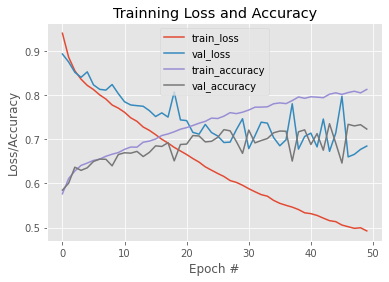

In [11]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 50), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 50), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 50), H.history["accuracy"], label="train_accuracy")
plt.plot(np.arange(0, 50), H.history["val_accuracy"], label="val_accuracy")
plt.title("Trainning Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig("./results/shallownet_animals3_trainning_result")